This notebook is to understand the dataset. The data preparation part will be summarized into notebook 'experiment'.

In [404]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# Import data

In [405]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
apartment_for_rent_classified = fetch_ucirepo(id=555) 
  
# data (as pandas dataframes) 
df = apartment_for_rent_classified.data.features 


# Clean data

In [406]:
df.dtypes

category          object
title             object
body              object
amenities         object
bathrooms         object
bedrooms          object
currency          object
fee               object
has_photo         object
pets_allowed      object
price            float64
price_display     object
price_type        object
square_feet       object
address           object
cityname          object
state             object
latitude         float64
longitude        float64
source            object
time             float64
dtype: object

In [407]:
df.head()

,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1,1,USD,No,Thumbnail,Cats,...,2195,Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1.577360e+09
1,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3,USD,No,Thumbnail,"Cats,Dogs",...,1250,Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1.577360e+09
2,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2,3,USD,No,Thumbnail,NaN,...,1395,Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1.577360e+09
3,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1,2,USD,No,Thumbnail,"Cats,Dogs",...,1600,Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1.577360e+09
4,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1,1,USD,No,Thumbnail,"Cats,Dogs",...,975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1.577360e+09


In [408]:
cols_to_numeric = ['bathrooms','bedrooms','price_display','square_feet']
df[cols_to_numeric] = df[cols_to_numeric].apply(pd.to_numeric, errors='coerce')

In [409]:
df.dtypes

category          object
title             object
body              object
amenities         object
bathrooms        float64
bedrooms         float64
currency          object
fee               object
has_photo         object
pets_allowed      object
price            float64
price_display    float64
price_type        object
square_feet      float64
address           object
cityname          object
state             object
latitude         float64
longitude        float64
source            object
time             float64
dtype: object

In [410]:
len(df)

99826

In [411]:
df.describe(include='O')

,category,title,body,amenities,currency,fee,has_photo,pets_allowed,price_type,address,cityname,state,source
count,99826,99826,99826,83749,99822,99823,99823,39192,99823,7946,99521,99521,99820
unique,10,58660,94806,9843,3,5,6,6,6,7774,2984,53,25
top,housing/rent/apartment,Apartment in great location,"When searching for a pet-friendly One-, Two- a...",Parking,USD,No,Yes,"Cats,Dogs",Monthly,8215 S.W 72nd Avenue,Dallas,TX,RentDigs.com
freq,99762,1066,45,6204,99820,99619,56165,37213,99816,19,2862,11279,91239


In [412]:
df['category'].value_counts(dropna=False)

category
housing/rent/apartment            99762
housing/rent/commercial/retail       42
housing/rent                          7
housing/rent/home                     4
housing/rent/short_term               4
housing/rent/condo                    3
Gym                                   1
Parking,Patio/Deck                    1
housing/rent/other                    1
2                                     1
Name: count, dtype: int64

In [413]:
df['currency'].value_counts(dropna=False)

currency
USD          99820
NaN              4
Cats,Dogs        1
1019             1
Name: count, dtype: int64

In [414]:
df['fee'].value_counts(dropna=False)

fee
No      99619
Yes       201
NaN         3
1380        1
2150        1
1019        1
Name: count, dtype: int64

In [415]:
df['has_photo'].value_counts(dropna=False)

has_photo
Yes          56165
Thumbnail    34394
No            9261
NaN              3
1380             1
2150             1
Monthly          1
Name: count, dtype: int64

In [416]:
df['pets_allowed'].value_counts(dropna=False)

pets_allowed
NaN               60634
Cats,Dogs         37213
Cats               1848
Dogs                127
Monthly               2
823                   1
Cats,Dogs,None        1
Name: count, dtype: int64

In [417]:
df['price_type'].value_counts(dropna=False)

price_type
Monthly           99816
Weekly                3
NaN                   3
Monthly|Weekly        1
Lawrence              1
Los Angeles           1
VA                    1
Name: count, dtype: int64

In [418]:
df['state'].value_counts(dropna=False)

state
TX              11279
CA              10341
VA               8305
NC               6308
CO               6295
FL               5788
MD               5309
MA               5041
OH               4911
GA               4790
NJ               4497
NV               2818
WA               2619
AZ               2384
LA               1355
MO               1203
PA               1139
TN               1115
IL               1036
NE               1020
KY                997
OK                961
KS                912
SC                908
UT                809
ND                743
NH                735
MI                710
NY                659
AR                598
MN                581
CT                515
IN                509
WI                430
IA                372
AL                354
NaN               305
OR                277
VT                125
RI                119
MS                107
ID                 96
DC                 93
MT                 88
SD                 86
AK  

In [419]:
df['source'].value_counts(dropna=False)

source
RentDigs.com         91239
RentLingo             6924
ListedBuy              571
GoSection8             437
RealRentals            269
tenantcloud            124
BostonApartments        94
RENTCaf                 41
Listanza                29
SpreadMyAd              22
RENTOCULAR              18
RentFeeder              12
Claz                     8
Home Rentals             8
NaN                      6
Nest Seekers             5
vFlyer                   5
rentbits                 5
Seattle Rentals          2
Real Estate Shows        1
Real Estate Agent        1
Apartable                1
Z57                      1
FreeAdsTime              1
AgentWebsite             1
HousesForRent            1
Name: count, dtype: int64

In [420]:
# function to remove the rows where the count of category value is very low (<=100).

def remove_rows_low_cat_value(df, col):
    
    # Step 1: Get the value counts
    value_counts = df[col].value_counts(dropna=False)

    # Step 2: Identify values with small counts (e.g., counts less than or equal to 100)
    small_count_values = value_counts[value_counts <= 100].index

    # Step 3: Filter out the rows with small count values
    df = df[~df[col].isin(small_count_values)]

    return df


In [421]:
cols_to_filter = ['category', 'currency', 'fee', 'has_photo', 'pets_allowed', 'price_type']
for col in cols_to_filter:
    df = remove_rows_low_cat_value(df,col)

In [422]:
len(df)

99754

In [423]:
df.describe(include='O')

,category,title,body,amenities,currency,fee,has_photo,pets_allowed,price_type,address,cityname,state,source
count,99754,99754,99754,83683,99754,99754,99754,39180,99754,7939,99452,99452,99754
unique,1,58629,94735,9835,1,2,3,3,1,7767,2979,51,25
top,housing/rent/apartment,Apartment in great location,"When searching for a pet-friendly One-, Two- a...",Parking,USD,No,Yes,"Cats,Dogs",Monthly,8215 S.W 72nd Avenue,Dallas,TX,RentDigs.com
freq,99754,1066,45,6202,99754,99553,56140,37205,99754,19,2862,11277,91190


In [424]:
df['state'].value_counts(dropna=False)

state
TX     11277
CA     10338
VA      8303
NC      6307
CO      6293
FL      5787
MD      5267
MA      5041
OH      4911
GA      4788
NJ      4497
NV      2818
WA      2618
AZ      2384
LA      1355
MO      1202
PA      1139
TN      1115
IL      1036
NE      1020
KY       996
OK       961
KS       912
SC       907
UT       809
ND       743
NH       735
MI       710
NY       655
AR       597
MN       579
CT       515
IN       509
WI       430
IA       372
AL       354
NaN      302
OR       277
VT       125
RI       119
MS       107
ID        96
DC        93
MT        88
SD        86
AK        58
ME        32
HI        31
NM        24
WY        16
WV        13
DE         7
Name: count, dtype: int64

In [425]:
# Drop columns where there is only one uqinue value

cols_to_drop = ['category', 'currency', 'price_type']

# Drop the columns in place
df.drop(columns=cols_to_drop, inplace=True)

In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99754 entries, 0 to 99825
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          99754 non-null  object 
 1   body           99754 non-null  object 
 2   amenities      83683 non-null  object 
 3   bathrooms      99693 non-null  float64
 4   bedrooms       99631 non-null  float64
 5   fee            99754 non-null  object 
 6   has_photo      99754 non-null  object 
 7   pets_allowed   39180 non-null  object 
 8   price          99753 non-null  float64
 9   price_display  99725 non-null  float64
 10  square_feet    99754 non-null  float64
 11  address        7939 non-null   object 
 12  cityname       99452 non-null  object 
 13  state          99452 non-null  object 
 14  latitude       99729 non-null  float64
 15  longitude      99729 non-null  float64
 16  source         99754 non-null  object 
 17  time           99754 non-null  float64
dtypes: float64(

In [427]:
df[df['latitude'].isna()]

,title,body,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,price_display,square_feet,address,cityname,state,latitude,longitude,source,time
5584,One BR Se Ash St,"This unit is located at Se Ash St, Portlad, 97...",NaN,1.0,1.0,No,Thumbnail,NaN,850.0,850.0,400.0,NaN,NaN,NaN,NaN,NaN,RentLingo,1.577359e+09
5585,One BR West Fifth & Mandalay Bay Road,This unit is located at West 5th & Mandalay Ba...,Pool,1.0,1.0,No,Thumbnail,NaN,1580.0,1580.0,400.0,NaN,NaN,NaN,NaN,NaN,RentLingo,1.577359e+09
5639,Two BR 2 BR,"This unit is located at two Beds, Clinton Twp,...",NaN,1.0,2.0,No,Thumbnail,Cats,780.0,780.0,850.0,NaN,NaN,NaN,NaN,NaN,RentLingo,1.577359e+09
5899,One BR Mullica Way,"This unit is located at Mullica Way, Devonshir...",Pool,1.0,1.0,No,Thumbnail,NaN,750.0,750.0,219.0,NaN,NaN,NaN,NaN,NaN,RentLingo,1.577359e+09
6385,One BR 1 BR,"This unit is located at one Beds, Clinton Twp,...",NaN,1.0,1.0,No,Thumbnail,Cats,749.0,749.0,700.0,NaN,NaN,NaN,NaN,NaN,RentLingo,1.577359e+09
6392,One BR S Tradition St,"This unit is located at S Tradition St, Mounta...",NaN,1.0,1.0,No,Thumbnail,NaN,1685.0,1685.0,1000.0,NaN,NaN,NaN,NaN,NaN,RentLingo,1.577359e+09
6393,One BR Hinson Ave,"This unit is located at Hinson Ave, Haines, 33...",Pool,1.0,1.0,No,Thumbnail,NaN,625.0,625.0,250.0,NaN,NaN,NaN,NaN,NaN,RentLingo,1.577359e+09
6525,One BR Leeward Ct,"This unit is located at Leeward Ct, Fleming Is...",NaN,1.0,1.0,No,Thumbnail,NaN,525.0,525.0,200.0,NaN,NaN,NaN,NaN,NaN,RentLingo,1.577015e+09
6601,One BR New Providence Dr Apartment 90,This unit is located at New Providence Dr Apar...,NaN,1.0,1.0,No,Thumbnail,NaN,750.0,750.0,220.0,NaN,NaN,NaN,NaN,NaN,RentLingo,1.577015e+09
6740,Two BR Lakeside Blvd,"This unit is located at Lakeside Blvd, Shelby ...",NaN,2.5,2.0,No,Thumbnail,"Cats,Dogs",1650.0,1650.0,1665.0,NaN,NaN,NaN,NaN,NaN,RentLingo,1.577017e+09


In [428]:
df[df['latitude'].isna()].iloc[0]['body']

'This unit is located at Se Ash St, Portlad, 97215, ORMonthly rental rates range from $850We have 1 beds units available for rent'

In [429]:
# remove rows where latitude and longitude in NaN
df = df[~df['latitude'].isna()]

In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99729 entries, 0 to 99825
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          99729 non-null  object 
 1   body           99729 non-null  object 
 2   amenities      83670 non-null  object 
 3   bathrooms      99668 non-null  float64
 4   bedrooms       99606 non-null  float64
 5   fee            99729 non-null  object 
 6   has_photo      99729 non-null  object 
 7   pets_allowed   39170 non-null  object 
 8   price          99728 non-null  float64
 9   price_display  99700 non-null  float64
 10  square_feet    99729 non-null  float64
 11  address        7939 non-null   object 
 12  cityname       99452 non-null  object 
 13  state          99452 non-null  object 
 14  latitude       99729 non-null  float64
 15  longitude      99729 non-null  float64
 16  source         99729 non-null  object 
 17  time           99729 non-null  float64
dtypes: float64(

In [431]:
df[df['price'].isna()].iloc[0]['body']

'Orlando Apply Today, Lease Today! Looking for your next home? Well, here it is! Starting at just $900/month, our spacious one beds apartments are comfortable and stylish, yet still affordable. Apply today and you could move-in to your brand new home, immediately! Contact for info and ask us about our limited-time rent special!*Units are limited. *Apartment shown in pictures is apartment listed. Ac, Spa or Pool, Small breed dogs accepted, Large Dogs , Cats allowed'

In [432]:
df = df[~df['price'].isna()]

In [433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99728 entries, 0 to 99825
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          99728 non-null  object 
 1   body           99728 non-null  object 
 2   amenities      83669 non-null  object 
 3   bathrooms      99667 non-null  float64
 4   bedrooms       99605 non-null  float64
 5   fee            99728 non-null  object 
 6   has_photo      99728 non-null  object 
 7   pets_allowed   39169 non-null  object 
 8   price          99728 non-null  float64
 9   price_display  99700 non-null  float64
 10  square_feet    99728 non-null  float64
 11  address        7938 non-null   object 
 12  cityname       99451 non-null  object 
 13  state          99451 non-null  object 
 14  latitude       99728 non-null  float64
 15  longitude      99728 non-null  float64
 16  source         99728 non-null  object 
 17  time           99728 non-null  float64
dtypes: float64(

In [434]:
df[df['price']!=df['price_display']]

,title,body,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,price_display,square_feet,address,cityname,state,latitude,longitude,source,time
50712,Modera Metro Dadeland West - West-A02,Receive waived app and admin charges on all ho...,NaN,1.0,1.0,No,Thumbnail,"Cats,Dogs",1782.0,NaN,639.0,8215 S.W 72nd Avenue,Miami,FL,25.7028,-80.2974,RENTCaf,1.565879e+09
50713,Modera Metro Dadeland West - West-B06,Receive waived app and admin charges on all ho...,NaN,2.0,2.0,No,Thumbnail,"Cats,Dogs",2882.0,NaN,1328.0,8215 S.W 72nd Avenue,Miami,FL,25.7028,-80.2974,RENTCaf,1.565879e+09
50731,2817 E 77th St - Two BR One BA Apartment,"This seven-plex in South Shore, Chicago featur...","Cable or Satellite,Wood Floors",1.0,2.0,No,Thumbnail,"Cats,Dogs",810.0,NaN,800.0,2817 E 77th St,Chicago,IL,41.7620,-87.5704,RENTCaf,1.567265e+09
50733,Modera Metro Dadeland West - West-A07D,Receive waived app and admin charges on all ho...,NaN,2.0,1.0,No,Thumbnail,"Cats,Dogs",2322.0,NaN,1004.0,8215 S.W 72nd Avenue,Miami,FL,25.7028,-80.2974,RENTCaf,1.565707e+09
50734,Modera Metro Dadeland West - West-A04C,Receive waived app and admin charges on all ho...,NaN,1.0,1.0,No,Thumbnail,"Cats,Dogs",1942.0,NaN,682.0,8215 S.W 72nd Avenue,Miami,FL,25.7028,-80.2974,RENTCaf,1.565707e+09
50854,Modera Metro Dadeland West - West-B02,Receive waived app and admin charges on all ho...,NaN,2.0,2.0,No,Thumbnail,"Cats,Dogs",2472.0,NaN,1096.0,8215 S.W 72nd Avenue,Miami,FL,25.7028,-80.2974,RENTCaf,1.565879e+09
50862,Modera Metro Dadeland West - West-S01A,Receive waived app and admin charges on all ho...,NaN,1.0,0.0,No,Thumbnail,"Cats,Dogs",1642.0,NaN,495.0,8215 S.W 72nd Avenue,Miami,FL,25.7028,-80.2974,RENTCaf,1.565707e+09
50868,Modera Metro Dadeland West - West-S01C,Receive waived app and admin charges on all ho...,NaN,1.0,0.0,No,Thumbnail,"Cats,Dogs",1702.0,NaN,567.0,8215 S.W 72nd Avenue,Miami,FL,25.7028,-80.2974,RENTCaf,1.565707e+09
50869,Modera Metro Dadeland West - West-B03A,Receive waived app and admin charges on all ho...,NaN,2.0,2.0,No,Thumbnail,"Cats,Dogs",2612.0,NaN,1138.0,8215 S.W 72nd Avenue,Miami,FL,25.7028,-80.2974,RENTCaf,1.565707e+09
50870,Modera Metro Dadeland West - West-B01B,Receive waived app and admin charges on all ho...,NaN,2.0,2.0,No,Thumbnail,"Cats,Dogs",2582.0,NaN,1095.0,8215 S.W 72nd Avenue,Miami,FL,25.7028,-80.2974,RENTCaf,1.565707e+09


In [435]:
# price_display can be removed
df.drop(columns='price_display', inplace=True)

In [436]:
df.describe()

,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,99667.000000,99605.000000,99728.000000,99728.000000,99728.000000,99728.000000,9.972800e+04
mean,1.445288,1.727955,1527.157418,956.363810,36.949110,-91.568411,1.559684e+09
std,0.546855,0.748862,903.610865,417.142672,4.600295,15.819650,1.104507e+07
min,1.000000,0.000000,100.000000,101.000000,19.573800,-159.369800,1.544174e+09
25%,1.000000,1.000000,1014.000000,729.000000,33.746500,-104.791900,1.550832e+09
50%,1.000000,2.000000,1350.000000,900.000000,37.225800,-84.562300,1.568745e+09
75%,2.000000,2.000000,1795.000000,1115.000000,39.954200,-77.606600,1.568767e+09
max,9.000000,9.000000,52500.000000,50000.000000,64.833200,-68.778800,1.577391e+09


In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99728 entries, 0 to 99825
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         99728 non-null  object 
 1   body          99728 non-null  object 
 2   amenities     83669 non-null  object 
 3   bathrooms     99667 non-null  float64
 4   bedrooms      99605 non-null  float64
 5   fee           99728 non-null  object 
 6   has_photo     99728 non-null  object 
 7   pets_allowed  39169 non-null  object 
 8   price         99728 non-null  float64
 9   square_feet   99728 non-null  float64
 10  address       7938 non-null   object 
 11  cityname      99451 non-null  object 
 12  state         99451 non-null  object 
 13  latitude      99728 non-null  float64
 14  longitude     99728 non-null  float64
 15  source        99728 non-null  object 
 16  time          99728 non-null  float64
dtypes: float64(7), object(10)
memory usage: 13.7+ MB


In [438]:
df[df['bathrooms'].isna()]

,title,body,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet,address,cityname,state,latitude,longitude,source,time
930,One BR Lions Court Apartments: 1200 Thompson Road,This unit is located at Lions Court Apartments...,NaN,NaN,1.0,No,Thumbnail,"Cats,Dogs",565.0,725.0,Lions CT Apartments 1200 Thompson Rd,Wichita Falls,TX,33.8994,-98.5280,RentLingo,1.577360e+09
1109,Studio apartment 2432 Penmar Ave,"This unit is located at 2432 Penmar Ave, Venic...",NaN,NaN,0.0,No,Thumbnail,NaN,1800.0,132.0,2432 Penmar Avenue,Venice,CA,33.9932,-118.4609,RentLingo,1.577359e+09
1364,"Studio apartment 13th Street NW, Monroe St NW,...","This unit is located at 13th Street NW, Monroe...",NaN,NaN,0.0,No,Thumbnail,NaN,990.0,239.0,13th St NW Monroe St NW Washington DC,Washington,DC,38.9118,-77.0132,RentLingo,1.577359e+09
1613,Two BR Greenbriar Terrace Apartments: 3003 W. ...,This unit is located at Greenbriar Terrace Apa...,NaN,NaN,2.0,No,Thumbnail,"Cats,Dogs",650.0,808.0,Greenbriar Terrace Apartments 3003 W 27th Avenue,Amarillo,TX,35.1872,-101.8587,RentLingo,1.577360e+09
1892,Studio apartment 122-126 East Genesee Street,This unit is located at 122-126 East Genesee S...,NaN,NaN,0.0,No,Thumbnail,NaN,600.0,350.0,122-126 East Genesee St,Syracuse,NY,43.0470,-76.1560,RentLingo,1.577360e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83735,Basement Efficiency Apartment - Monthly (Denve...,"Harvard Gulch / Rosedale, 1 Block North of Por...",NaN,NaN,1.0,No,Thumbnail,NaN,825.0,720.0,NaN,Denver,CO,39.7360,-104.9819,SpreadMyAd,1.547858e+09
83736,"DISCOUNTED, PRICE NEOGOTIABLE* Edina Apartment...","*DISCOUNTED*, up-to-date apartment! Originally...",Wood Floors,NaN,3.0,No,Yes,NaN,2500.0,1520.0,7201 York Avenue S,Minneapolis,MN,44.9855,-93.3023,SpreadMyAd,1.547858e+09
83737,The prime location you've been waiting for! Be...,The Castle Pricing: pne bedroom $850 - $960 / ...,"Dishwasher,Refrigerator",NaN,1.0,No,Yes,NaN,850.0,505.0,NaN,Anchorage,AK,61.1723,-149.8414,SpreadMyAd,1.547858e+09
83740,Artisan Apartment Sublease 4/1 (133 W Pittsbur...,Sublease available starting 4/1 until 12/31. R...,"AC,Gym",NaN,1.0,No,Yes,NaN,1210.0,747.0,NaN,Milwaukee,WI,43.0531,-87.9659,SpreadMyAd,1.547859e+09


In [439]:
df.loc[930]['body']

'This unit is located at Lions Court Apartments: 1200 Thompson Road, Wichita Falls, 76301, TXMonthly rental rates range from $565 - $699We have one - three beds units available for rent'

In [440]:
df.loc[1109]['body']

'This unit is located at 2432 Penmar Ave, Venice, 90291, CAMonthly rental rates range from $1800We have studio units available for rent'

In [441]:
df.loc[1892]['body']

'This unit is located at 122-126 East Genesee Street, Syracuse, 13202, NYMonthly rental rates range from $600We have studio units available for rent'

In [442]:
df[df['bedrooms'].isna()]

,title,body,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet,address,cityname,state,latitude,longitude,source,time
790,Studio apartment 606 Spokane Ct,"This unit is located at 606 Spokane Ct, Frankl...",NaN,2.5,NaN,No,Thumbnail,NaN,1950.0,1575.0,606 Spokane Court,Franklin,TN,35.9393,-86.8716,RentLingo,1.577360e+09
1653,Studio apartment 11 Calle de Arena,"This unit is located at eleven Calle de Arena,...",NaN,3.0,NaN,No,Thumbnail,NaN,1100.0,1900.0,11 Calle DE Arena,Rancho Santa Margarita,CA,33.6340,-117.6061,RentLingo,1.577359e+09
5024,Studio apartment 303-319 Market Street,"This unit is located at 303-319 Market Street,...",NaN,2.0,NaN,No,Thumbnail,NaN,2050.0,989.0,303-319 Market St,San Diego,CA,32.7876,-117.1265,RentLingo,1.577360e+09
7212,bedroom in Medford MA 02155,Medford Walk-In Store Front Commercial Retail ...,NaN,1.0,NaN,No,Thumbnail,NaN,1200.0,550.0,110 Central Avenue,Medford,MA,42.4194,-71.1110,Listanza,1.577312e+09
7280,5115 N 40th St,all utilities included avail 12/20/19 or 1/8/2...,"Cable or Satellite,Garbage Disposal,Pool,Refri...",1.0,NaN,No,No,NaN,849.0,405.0,5115 N 40th St,Phoenix,AZ,33.4993,-111.9838,GoSection8,1.570657e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97166,Commuter's Dream in highly desirable Conshohoc...,"Two minutes to 76, 476, turnpike and train. An...",Parking,1.0,NaN,No,Yes,NaN,810.0,300.0,NaN,Conshohocken,PA,40.0825,-75.3010,RentDigs.com,1.544199e+09
97185,Apartment in great location. Cat OK!,Forest Downs Apartments in Fitchburg feature a...,"Parking,Washer Dryer",1.0,NaN,No,Yes,Cats,895.0,600.0,NaN,Madison,WI,43.0335,-89.4449,RentDigs.com,1.544195e+09
98277,Apartment for rent in Houston.,Rent $475. Discount given for good credit scor...,"AC,Refrigerator",1.0,NaN,No,Yes,"Cats,Dogs",475.0,432.0,NaN,Houston,TX,29.6881,-95.4329,RentDigs.com,1.544183e+09
99037,Apartment in prime location. Pet OK!,Oxford apartments is located in the heart of K...,NaN,1.0,NaN,No,Yes,"Cats,Dogs",1195.0,400.0,NaN,Los Angeles,CA,34.0480,-118.2908,RentDigs.com,1.544204e+09


In [443]:
df.loc[790]['body']

'This unit is located at 606 Spokane Ct, Franklin, 37064, TNMonthly rental rates range from $1950We have studio units available for rent'

In [444]:
df.loc[1653]['body']

'This unit is located at eleven Calle de Arena, Rancho Santa Margarita, 92688, CAMonthly rental rates range from $1100We have studio units available for rent'

In [445]:
df.loc[7212]['body']

"Medford Walk-In Store Front Commercial Retail or Office Space For Rent Only $1200 A Month Utilities Separate. FEATURES: 550 sq. feet Large Window For Marketing Display Lots of Sun In Front Area Vaulted ceilings Private Bathroom Strong In Basement Gas Heating, Wall Air conditioning Flooring Has Been Changed To Laminated Hardwood MOVE-IN-COST: 1st Month Rent, Full Month Security Deposit, 1 Mon Broker\\'s Fee, Plus $35 Credit Processing Fee CONTACT: HERMAN 781-346-XXXX No Ok for pets (RLNE5348453)- Lease Term: 12 mnths- Lease Term: 24 mnths"

In [446]:
# Use str.contains with case=False for case-insensitive matching
df[df['title'].str.contains("studio", case=False, na=False) | df['body'].str.contains("studio", case=False, na=False)]

# Yoga studio can be in 'body'

,title,body,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet,address,cityname,state,latitude,longitude,source,time
19,Studio apartment 7428 N Charleston Ave,"This unit is located at 7428 N Charleston Ave,...",NaN,1.0,2.0,No,Thumbnail,"Cats,Dogs",1250.0,435.0,7428 N Charleston Avenue,Portland,OR,45.5091,-122.6449,RentLingo,1.577360e+09
20,Studio apartment 610 NW 17th Ave,"This unit is located at 610 NW 17th Ave, Portl...",NaN,1.0,0.0,No,Thumbnail,"Cats,Dogs",1099.0,290.0,610 NW 17th Avenue,Portland,OR,45.5091,-122.6449,RentLingo,1.577360e+09
31,Studio apartment 300 E Riverside Dr,"This unit is located at 300 E Riverside Dr, Au...",NaN,1.0,1.0,No,Thumbnail,NaN,1722.0,453.0,300 E Riverside Drive,Austin,TX,30.3054,-97.7497,RentLingo,1.577360e+09
35,Studio apartment 2123 Shady Ave,"This unit is located at 2123 Shady Ave, Pittsb...",NaN,1.0,0.0,No,Thumbnail,"Cats,Dogs",895.0,430.0,2123 Shady Avenue,Pittsburgh,PA,40.4448,-79.9725,RentLingo,1.577360e+09
48,Studio apartment 815 18th St S,"This unit is located at 815 18th St S, Arlingt...","Dishwasher,Refrigerator",1.0,2.0,No,Thumbnail,"Cats,Dogs",1549.0,431.0,815 18th St S,Arlington,VA,38.8738,-77.1055,RentLingo,1.577359e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99804,Convenient location One BR One BA for rent,Up to a month and half FREE! Brand new and des...,"Fireplace,Patio/Deck,Pool,Storage,TV,Washer Dryer",1.0,1.0,No,Yes,NaN,1550.0,942.0,NaN,Jacksonville,FL,30.3034,-81.5127,RentDigs.com,1.544186e+09
99806,"Eugene - 2bd/Two BA 1,004sqft Apartment for rent","Square footage: 1004 sq-ft, unit number: 0157....","Basketball,Storage",2.0,2.0,No,Yes,NaN,1260.0,1004.0,NaN,Eugene,OR,44.0541,-123.0920,RentDigs.com,1.544186e+09
99807,Prominence Apartments One BR Luxury Apartment ...,"Square footage: 883 square feet, unit number: ...","Fireplace,Gym,Internet Access,Parking,Pool,Sto...",1.0,1.0,No,Yes,NaN,1155.0,883.0,NaN,Huntersville,NC,35.2016,-80.8124,RentDigs.com,1.544186e+09
99809,Convenient location Two BR Two BA for rent,"Square footage: 1114 sq-ft, unit number: 522. ...","Fireplace,Gym,Internet Access,Parking,Pool,Sto...",2.0,2.0,No,Yes,NaN,1460.0,1114.0,NaN,Granite Quarry,NC,35.6091,-80.4434,RentDigs.com,1.544186e+09


In [447]:
df.loc[99809]['body']

"Square footage: 1114 sq-ft, unit number: 522. Active lifestyle community near Charlotte, NC. Surrounded by prestigious neighborhoods yet conveniently located minutes from Uptown Charlotte, as well as, nearby fine shops, restaurants, schools, entertainment and more! Exquisite apartment homes combined with Huntersville's most desirable location makes Skybrook Apartments an ideal. With luxurious amenities including an outdoor living room with fireplace, community wide wireless internet and full service coffee bar to name a few, Skybrook Apartments has something for everyone! Yoga Studio with Fitness on Demand Options, Resident Package Acceptance Lockers, Car Wash Station, Salt Water Pool, Pet DNA Program, Grill Area/Outdoor Kitchen, Pet Washing Station, Outdoor Kitchen with Fireplace and TELEVISION, Fitness facilities with Cardio and Strength Equipment, Electronic Vehicle Charging Station, Fire sprinkler system, 24 hour."

In [448]:
df.loc[99809]

title                  Convenient location Two BR Two BA for rent
body            Square footage: 1114 sq-ft, unit number: 522. ...
amenities       Fireplace,Gym,Internet Access,Parking,Pool,Sto...
bathrooms                                                     2.0
bedrooms                                                      2.0
fee                                                            No
has_photo                                                     Yes
pets_allowed                                                  NaN
price                                                      1460.0
square_feet                                                1114.0
address                                                       NaN
cityname                                           Granite Quarry
state                                                          NC
latitude                                                  35.6091
longitude                                                -80.4434
source    

In [449]:
df[df['title'].str.contains("studio", case=False, na=False) ]

,title,body,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet,address,cityname,state,latitude,longitude,source,time
19,Studio apartment 7428 N Charleston Ave,"This unit is located at 7428 N Charleston Ave,...",NaN,1.0,2.0,No,Thumbnail,"Cats,Dogs",1250.0,435.0,7428 N Charleston Avenue,Portland,OR,45.5091,-122.6449,RentLingo,1.577360e+09
20,Studio apartment 610 NW 17th Ave,"This unit is located at 610 NW 17th Ave, Portl...",NaN,1.0,0.0,No,Thumbnail,"Cats,Dogs",1099.0,290.0,610 NW 17th Avenue,Portland,OR,45.5091,-122.6449,RentLingo,1.577360e+09
31,Studio apartment 300 E Riverside Dr,"This unit is located at 300 E Riverside Dr, Au...",NaN,1.0,1.0,No,Thumbnail,NaN,1722.0,453.0,300 E Riverside Drive,Austin,TX,30.3054,-97.7497,RentLingo,1.577360e+09
35,Studio apartment 2123 Shady Ave,"This unit is located at 2123 Shady Ave, Pittsb...",NaN,1.0,0.0,No,Thumbnail,"Cats,Dogs",895.0,430.0,2123 Shady Avenue,Pittsburgh,PA,40.4448,-79.9725,RentLingo,1.577360e+09
48,Studio apartment 815 18th St S,"This unit is located at 815 18th St S, Arlingt...","Dishwasher,Refrigerator",1.0,2.0,No,Thumbnail,"Cats,Dogs",1549.0,431.0,815 18th St S,Arlington,VA,38.8738,-77.1055,RentLingo,1.577359e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99615,Studio in Indianapolis. Washer/Dryer Hookups!,Olivewood Apartments is conveniently located o...,Washer Dryer,1.0,2.0,No,Yes,NaN,634.0,864.0,NaN,Indianapolis,IN,39.7824,-86.0445,RentDigs.com,1.544259e+09
99659,This studio apartment is READY FOR MOVE IN. Pe...,It is located in a prime location near Interst...,"AC,Refrigerator",1.0,1.0,No,Yes,"Cats,Dogs",550.0,225.0,NaN,San Antonio,TX,29.3987,-98.4691,RentDigs.com,1.544255e+09
99728,Miami \ Studio - must see to believe.,"Square footage: 619 square feet, unit number: ...","Gym,Patio/Deck,Pool,Washer Dryer",1.0,2.0,No,Yes,NaN,1961.0,619.0,NaN,Miami,FL,25.7191,-80.2719,RentDigs.com,1.544249e+09
99798,Studio - Massive Alcove Studio.,"Giant Living area, Generous Alcove - Fits Quee...","AC,Dishwasher,Storage,Wood Floors",1.0,0.0,No,Yes,NaN,3400.0,647.0,NaN,New York,NY,40.7863,-73.9772,RentDigs.com,1.544186e+09


Some studio have bedrooms 1 or 0.

Amenities, price, bedrooms are not that accurate. e.g. 99824

In [450]:
# Selecting the rows by index and printing the 'body' column
rows = df.loc[[99728, 99798, 99824], 'body']

# Print the full text of the 'body' column for the selected rows
for idx in rows.index:
    print(f"Index {idx}:")
    print(rows.loc[idx])
    print("\n" + "-"*80 + "\n")  # Separator for better readability

Index 99728:
Square footage: 619 square feet, unit number: 0961. You can indulge not only in our twenty-four-hour modern 3, 000. ft. fitness facilities, but also in our Spa area that includes a steam room and sauna in a beautiful private setting. Pet conditions, Green Certified, Fitness facilities, Heated Saline Pool Concierge Services, Private Cabanas, Pool, Sauna, Indoor Dog Park, Game Room, Business facility, Steam Room, Demonstation Kitchen, Fitness On Demand, Controlled Access, Spin Room, Automated Package Locker, Grilling Area, Resident Lounge, Balcony, COMPLIANT WITH ENERGY STAR Appliances, Washer and dryer, Pool Views, Tiled Flooring, Granite, ten Ceilings, Furnished Apartments 9' Ceilings, Stainless Appliances. At Gables, we feel your pets are members of our extended family so we strive to make them feel only is our community petcentric, but we ve developed Gables Paws to Care program to celebrate your pet while also giving back to the pet community! Gables Ponce welcomes cats

In [451]:
df['cityname'].value_counts()

cityname
Dallas              2862
Denver              2759
Los Angeles         2434
Las Vegas           1851
Arlington           1577
                    ... 
North Hampton          1
Edgewater Park         1
New Milford            1
Berkeley Heights       1
Willow Grove           1
Name: count, Length: 2979, dtype: int64

# Feature Engineering

## Feature: state

- Region Grouping: A common way of referring to regions in the United States is grouping them into 5 regions according to their geographic position on the continent: the Northeast, Southwest, West, Southeast, and Midwest. [ref](https://education.nationalgeographic.org/resource/united-states-regions/)
- Incorporating External Data: Include additional features such as state population, average income, or cost of living index to provide context. (next step)

In [452]:
# Define state to region mapping
state_to_region = {
    'AL': 'Southeast', 'AK': 'West', 'AZ': 'Southwest', 'AR': 'Southeast', 'CA': 'West',
    'CO': 'Southwest', 'CT': 'Northeast', 'DE': 'Southeast', 'FL': 'Southeast', 'GA': 'Southeast',
    'HI': 'West', 'ID': 'West', 'IL': 'Midwest', 'IN': 'Midwest', 'IA': 'Midwest',
    'KS': 'Midwest', 'KY': 'Southeast', 'LA': 'Southeast', 'ME': 'Northeast', 'MD': 'Southeast',
    'MA': 'Northeast', 'MI': 'Midwest', 'MN': 'Midwest', 'MS': 'Southeast', 'MO': 'Midwest',
    'MT': 'West', 'NE': 'Midwest', 'NV': 'West', 'NH': 'Northeast', 'NJ': 'Northeast',
    'NM': 'Southwest', 'NY': 'Northeast', 'NC': 'Southeast', 'ND': 'Midwest', 'OH': 'Midwest',
    'OK': 'Southwest', 'OR': 'West', 'PA': 'Northeast', 'RI': 'Northeast', 'SC': 'Southeast',
    'SD': 'Midwest', 'TN': 'Southeast', 'TX': 'Southwest', 'UT': 'West', 'VT': 'Northeast',
    'VA': 'Southeast', 'WA': 'West', 'WV': 'Southeast', 'WI': 'Midwest', 'WY': 'West',
    'DC': 'Southeast'
}


# Create a new 'region' column
df['region'] = df['state'].map(state_to_region)


In [453]:
df.region.value_counts()

region
Southeast    35995
Southwest    20939
West         17149
Northeast    12858
Midwest      12510
Name: count, dtype: int64

In [454]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99728 entries, 0 to 99825
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         99728 non-null  object 
 1   body          99728 non-null  object 
 2   amenities     83669 non-null  object 
 3   bathrooms     99667 non-null  float64
 4   bedrooms      99605 non-null  float64
 5   fee           99728 non-null  object 
 6   has_photo     99728 non-null  object 
 7   pets_allowed  39169 non-null  object 
 8   price         99728 non-null  float64
 9   square_feet   99728 non-null  float64
 10  address       7938 non-null   object 
 11  cityname      99451 non-null  object 
 12  state         99451 non-null  object 
 13  latitude      99728 non-null  float64
 14  longitude     99728 non-null  float64
 15  source        99728 non-null  object 
 16  time          99728 non-null  float64
 17  region        99451 non-null  object 
dtypes: float64(7), object(11)
memor

In [455]:
df.describe()

,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,99667.000000,99605.000000,99728.000000,99728.000000,99728.000000,99728.000000,9.972800e+04
mean,1.445288,1.727955,1527.157418,956.363810,36.949110,-91.568411,1.559684e+09
std,0.546855,0.748862,903.610865,417.142672,4.600295,15.819650,1.104507e+07
min,1.000000,0.000000,100.000000,101.000000,19.573800,-159.369800,1.544174e+09
25%,1.000000,1.000000,1014.000000,729.000000,33.746500,-104.791900,1.550832e+09
50%,1.000000,2.000000,1350.000000,900.000000,37.225800,-84.562300,1.568745e+09
75%,2.000000,2.000000,1795.000000,1115.000000,39.954200,-77.606600,1.568767e+09
max,9.000000,9.000000,52500.000000,50000.000000,64.833200,-68.778800,1.577391e+09


In [456]:
df[df['square_feet']==50000]

,title,body,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet,address,cityname,state,latitude,longitude,source,time,region
51975,bedroom in Long Island NY 11109,No Broker's Fee + 1 mnth free. By Appointment ...,"Cable or Satellite,Doorman,Gym,Storage,TV,Tenn...",NaN,1.0,No,Thumbnail,NaN,2640.0,50000.0,4545 Center Boulevard,NaN,NaN,40.7447,-73.9492,Listanza,1.556925e+09,NaN


In [457]:
df.loc[51975]['body']

"No Broker's Fee + 1 mnth free. By Appointment Only Several Different Layouts - Pricing - five Buildings to choose from - flexible move in dates (UP TO three WEEKS OUT) five Brand New Luxury buildings Overlooking acres of green parks, a Breath taking view The Empire State Building, the U.N. the Pepsi sign and the Manhattan skyline. Building Amenities Outdoor 50,000 sq-ft roof top park four BBQ Grills and pvt cabanas Tennis courts and Beach Volley Ball twenty-four hour Fitness facilities available to residents of both buildings twenty-four hour Tenant Lounge with free wi-fi, cable television, pool table, and full kitchen twenty-four hour attended lobby with Attendant at door Washer & dryer area, valet for drop of service Parking and Bike Storage Apartment Amenities Oversize Floor to ceiling windows views of the Empire State Building and U.N. Soaring ceilings Stone counters Open Kitchen Stainless appliances Hardwood flooring Porcelain and glass tile kitchens and baths"

## Feature: square_feet

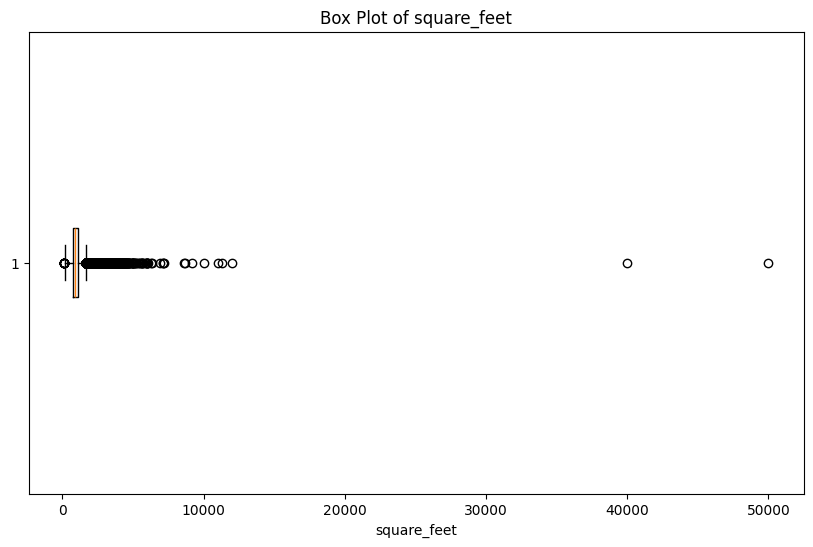

In [458]:
# Plotting the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['square_feet'].dropna(), vert=False)
plt.title('Box Plot of square_feet')
plt.xlabel('square_feet')
plt.show()


In [459]:
# Define a threshold to filter out extreme outliers
upper_limit = df['square_feet'].quantile(0.99)

In [460]:
upper_limit

np.float64(2255.729999999996)

In [461]:
df = df[df['square_feet'] <= upper_limit]


In [462]:
df.describe()

,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,98672.000000,98610.000000,98730.000000,98730.000000,98730.000000,98730.000000,9.873000e+04
mean,1.430320,1.705750,1505.220004,934.973483,36.955533,-91.538949,1.559657e+09
std,0.519708,0.711835,776.539534,290.911065,4.595418,15.801716,1.102435e+07
min,1.000000,0.000000,100.000000,101.000000,19.573800,-159.369800,1.544174e+09
25%,1.000000,1.000000,1010.000000,726.000000,33.749600,-104.790400,1.550832e+09
50%,1.000000,2.000000,1349.000000,900.000000,37.265800,-84.552900,1.568745e+09
75%,2.000000,2.000000,1780.000000,1107.000000,39.955900,-77.576700,1.568767e+09
max,4.500000,6.000000,52500.000000,2255.000000,64.833200,-68.778800,1.577391e+09


In [463]:
df[df['price']==df['price'].max()]

,title,body,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet,address,cityname,state,latitude,longitude,source,time,region
6863,Studio apartment for rent,Barstow It's 14/18ft. studio apartment furnish...,"AC,Cable or Satellite,Internet Access,Patio/De...",1.0,0.0,No,Thumbnail,NaN,52500.0,1418.0,1101 Pueblo Drive,Barstow,CA,34.887,-117.035,RentDigs.com,1.577186e+09,West


In [464]:
df.loc[6863]['body']

"Barstow It's 14/18ft. studio apartment furnished include utilities, television, Internet hook up nice big deck. $500.00/ month $350.00 deposit. 1st month$450.00. A-c, Alarm, Balcony, Deck, Patio or Porch, Cable Ready, Microwave, Oversized Closets, Paid Utilities, Highspeed internet Available"

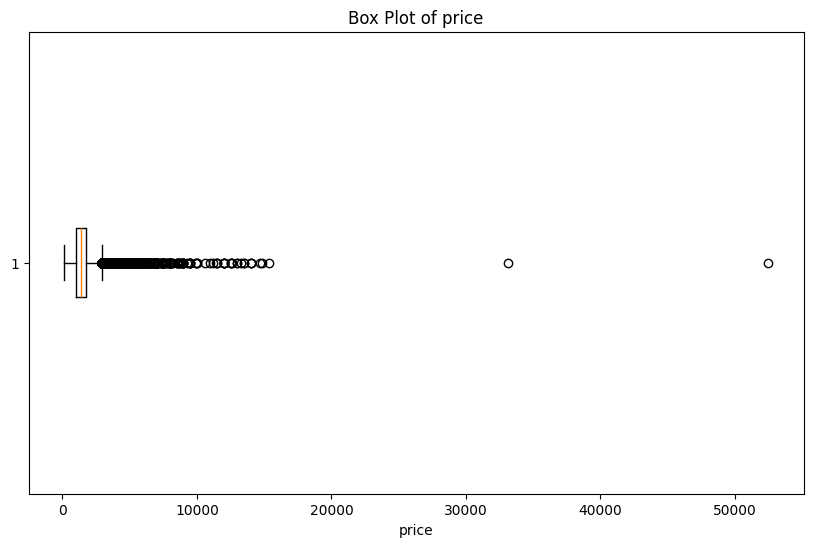

In [465]:
# Plotting the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['price'].dropna(), vert=False)
plt.title('Box Plot of price')
plt.xlabel('price')
plt.show()

In [466]:
# Define a threshold to filter out extreme outliers
upper_limit = df['price'].quantile(0.99)
upper_limit

np.float64(4050.0)

In [467]:
df = df[df['price'] <= upper_limit]

In [468]:
df

,title,body,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet,address,cityname,state,latitude,longitude,source,time,region
0,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,No,Thumbnail,Cats,2195.0,542.0,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1.577360e+09,West
1,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,No,Thumbnail,"Cats,Dogs",1250.0,1500.0,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1.577360e+09,Southeast
2,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,No,Thumbnail,NaN,1395.0,1650.0,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1.577360e+09,Southeast
3,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,No,Thumbnail,"Cats,Dogs",1600.0,820.0,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1.577360e+09,West
4,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,No,Thumbnail,"Cats,Dogs",975.0,624.0,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1.577360e+09,Southwest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99821,Houston - superb Apartment nearby fine dining,"Redefining urban living, in southeast Houston,...","Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1.0,1.0,No,Yes,NaN,780.0,605.0,NaN,Houston,TX,29.6151,-95.1998,RentDigs.com,1.544186e+09,Southwest
99822,The Best of the Best in the City of Jacksonvil...,Courtney Manor Apartments offer the best of ev...,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,2.0,No,Yes,"Cats,Dogs",813.0,921.0,NaN,Jacksonville,FL,30.2254,-81.7579,RentDigs.com,1.544186e+09,Southeast
99823,A great & large One BR apartment. Pet OK!,"Fully remodeled, new floor, kitchen cabinet, s...","Garbage Disposal,Refrigerator",1.0,1.0,No,Yes,"Cats,Dogs",1325.0,650.0,NaN,San Diego,CA,32.7379,-117.0914,RentDigs.com,1.544186e+09,West
99824,"The Crest offers studio, 1, 2 & Three BR homes...","Amenities include a fitness facilities, swimmi...","Gym,Pool",1.0,1.0,No,Yes,"Cats,Dogs",931.0,701.0,NaN,Huntersville,NC,35.4158,-80.8451,RentDigs.com,1.544186e+09,Southeast


In [469]:
df.describe()

,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,97687.000000,97626.000000,97745.000000,97745.000000,97745.000000,97745.000000,9.774500e+04
mean,1.424355,1.699721,1466.531188,930.812737,36.967116,-91.437282,1.559621e+09
std,0.516523,0.708726,632.395726,286.998323,4.593034,15.703708,1.102303e+07
min,1.000000,0.000000,100.000000,101.000000,19.573800,-159.369800,1.544174e+09
25%,1.000000,1.000000,1005.000000,725.000000,33.746200,-104.768800,1.550832e+09
50%,1.000000,2.000000,1340.000000,900.000000,37.277000,-84.545100,1.568745e+09
75%,2.000000,2.000000,1757.000000,1103.000000,39.953900,-77.576700,1.568767e+09
max,4.500000,6.000000,4050.000000,2255.000000,64.833200,-68.778800,1.577391e+09


In [470]:
# remove NaN in bathrooms and bedrooms
df = df[~df['bathrooms'].isna() & ~df['bedrooms'].isna()]

In [471]:
df.describe()

,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,97568.000000,97568.000000,97568.000000,97568.000000,97568.000000,97568.000000,9.756800e+04
mean,1.424791,1.700066,1467.045824,931.430510,36.966995,-91.423313,1.559614e+09
std,0.516579,0.708448,632.322967,286.492087,4.592958,15.696938,1.102172e+07
min,1.000000,0.000000,100.000000,107.000000,19.573800,-159.369800,1.544174e+09
25%,1.000000,1.000000,1005.000000,726.000000,33.743500,-104.760400,1.550832e+09
50%,1.000000,2.000000,1340.000000,900.000000,37.277250,-84.538200,1.568745e+09
75%,2.000000,2.000000,1758.000000,1103.000000,39.953900,-77.576700,1.568767e+09
max,4.500000,6.000000,4050.000000,2255.000000,64.833200,-68.778800,1.577391e+09


In [472]:
df.describe(include='O')

,title,body,amenities,fee,has_photo,pets_allowed,address,cityname,state,source,region
count,97568,97568,82184,97568,97568,38573,7518,97309,97309,97568,97309
unique,57072,92608,9570,2,3,3,7354,2918,51,25,5
top,Apartment in great location,"When searching for a pet-friendly One-, Two- a...",Parking,No,Yes,"Cats,Dogs",8215 S.W 72nd Avenue,Dallas,TX,RentDigs.com,Southeast
freq,1047,45,6080,97384,54982,36647,19,2853,11169,89486,35478


             bathrooms  bedrooms  square_feet  latitude  longitude     price
bathrooms     1.000000  0.655737     0.722699 -0.088910   0.002689  0.267822
bedrooms      0.655737  1.000000     0.706440  0.019362   0.052049  0.187251
square_feet   0.722699  0.706440     1.000000 -0.030744   0.109159  0.323693
latitude     -0.088910  0.019362    -0.030744  1.000000   0.074356  0.116276
longitude     0.002689  0.052049     0.109159  0.074356   1.000000 -0.087683
price         0.267822  0.187251     0.323693  0.116276  -0.087683  1.000000


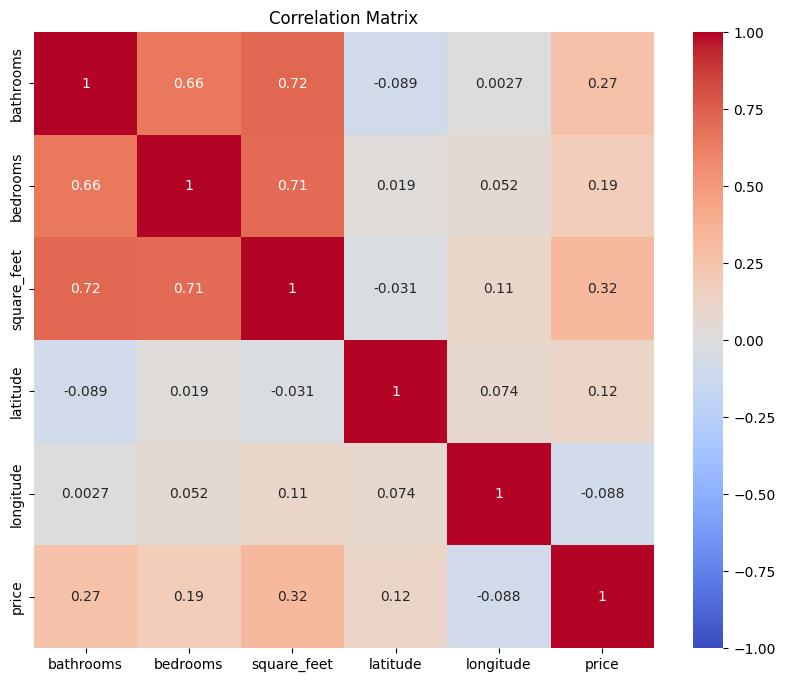

In [473]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dataframe with the relevant columns
columns_of_interest = ['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude', 'price']
correlation_matrix = df[columns_of_interest].corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [474]:
df['amenities']

0                                                      NaN
1                                                      NaN
2                                                      NaN
3                                                      NaN
4                                                      NaN
                               ...                        
99821    Gym,Parking,Patio/Deck,Playground,Storage,Wood...
99822    AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...
99823                        Garbage Disposal,Refrigerator
99824                                             Gym,Pool
99825                            Gated,Parking,Wood Floors
Name: amenities, Length: 97568, dtype: object

In [475]:
# Fill NaN values with an empty string
df['amenities'] = df['amenities'].fillna('')
# Convert amenities to a format suitable for CountVectorizer
df['amenities_list'] = df['amenities'].apply(lambda x: x.split(','))

In [476]:
# Convert list of amenities back to string format required by CountVectorizer
df['amenities_str'] = df['amenities_list'].apply(lambda x: ' '.join(x))

In [477]:
from sklearn.feature_extraction.text import CountVectorizer
# Use CountVectorizer to create binary feature matrix
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(), binary=True)
amenities_matrix = vectorizer.fit_transform(df['amenities_str'])

# Convert the binary feature matrix to a DataFrame
amenities_df = pd.DataFrame(amenities_matrix.toarray(), columns=vectorizer.get_feature_names_out())

In [478]:
amenities_df

,ac,access,alarm,basketball,cable,clubhouse,dishwasher,disposal,doorman,dryer,...,pool,refrigerator,satellite,storage,tennis,tub,tv,view,washer,wood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97563,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
97564,1,0,0,0,1,1,1,0,0,1,...,1,1,1,1,0,0,1,0,1,0
97565,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
97566,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [479]:
from sklearn.feature_extraction.text import CountVectorizer

# Reset index of df first and then concatenate later
df.reset_index(drop=True, inplace=True)

# Fill NaN values with an empty string
df['amenities'] = df['amenities'].fillna('')

# Convert amenities to a format suitable for CountVectorizer
df['amenities_list'] = df['amenities'].apply(lambda x: x.split(','))

# Convert list of amenities back to string format required by CountVectorizer
df['amenities_str'] = df['amenities_list'].apply(lambda x: ' '.join(x))

# Use CountVectorizer to create binary feature matrix
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(), binary=True)
amenities_matrix = vectorizer.fit_transform(df['amenities_str'])

# Convert the binary feature matrix to a DataFrame
amenities_df = pd.DataFrame(amenities_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenate the original DataFrame with the new binary features DataFrame
df = pd.concat([df, amenities_df], axis=1)

# Drop the temporary columns
df = df.drop(['amenities', 'amenities_list', 'amenities_str'], axis=1)

In [480]:
df['time'][0]

np.float64(1577360355.0)

In [481]:
# Convert the timestamp column to datetime
df['time'] = pd.to_datetime(df['time'], unit='s')

In [482]:
# Extract features from datetime
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['day_of_year'] = df['time'].dt.dayofyear
df['week_of_year'] = df['time'].dt.isocalendar().week

In [314]:
df.loc[0]

title                                  One BR 507 & 509 Esplanade
body            This unit is located at 507 & 509 Esplanade, R...
bathrooms                                                     1.0
bedrooms                                                      1.0
fee                                                            No
has_photo                                               Thumbnail
pets_allowed                                                 Cats
price                                                      2195.0
square_feet                                                 542.0
address                                        507  509 Esplanade
cityname                                            Redondo Beach
state                                                          CA
latitude                                                   33.852
longitude                                               -118.3759
source                                                  RentLingo
time      

In [483]:
df['year'].value_counts()

year
2019    81852
2018    15716
Name: count, dtype: int64

In [316]:
df['day_of_year'].value_counts()

day_of_year
53     30896
260    22588
261    19793
342    10899
360     4810
       ...  
294        1
69         1
129        1
295        1
307        1
Name: count, Length: 310, dtype: int64